In [23]:
import numpy as np
import pandas as pd

import torch
import torch.nn

from times import StyleScoreVAE
from ssvae_trainer import SSVAETrainer

%matplotlib inline

In [2]:
mf = pd.read_csv('./dataset/multifactor_score_20200228.csv', index_col=0, header=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
mf.head()

,code,trade_date,pm_5,pm_10,pm_20,pm_40,pm_60,pm_90,pm_120,pm_250,...,skew_250,turnover_5,turnover_10,turnover_20,turnover_40,turnover_60,turnover_90,turnover_120,turnover_250,log_mktcap
0,A000020,2013-01-16,0.317186,0.274228,0.265448,0.576029,0.464767,0.523478,0.549239,0.591994,...,0.734468,0.001167,0.001047,0.001516,0.001662,0.002244,0.002661,0.002195,0.001712,0.448285
1,A000020,2013-01-17,0.321439,0.312343,0.296576,0.583730,0.466944,0.532652,0.548410,0.603134,...,0.734940,0.001108,0.001004,0.001437,0.001609,0.002213,0.002639,0.002184,0.001706,0.451232
2,A000020,2013-01-18,0.298178,0.288183,0.256041,0.535444,0.439704,0.525804,0.516215,0.594420,...,0.735779,0.000817,0.000974,0.001360,0.001540,0.002190,0.002598,0.002178,0.001703,0.451096
3,A000020,2013-01-21,0.296404,0.341285,0.177490,0.472382,0.427241,0.550005,0.487227,0.561608,...,0.728325,0.000745,0.001013,0.001320,0.001532,0.002166,0.002572,0.002156,0.001698,0.450006
4,A000020,2013-01-22,0.258214,0.278217,0.208626,0.462013,0.432323,0.499384,0.494755,0.565308,...,0.729019,0.000699,0.000983,0.001250,0.001537,0.002117,0.002542,0.002149,0.001696,0.443772


In [4]:
ssvae = StyleScoreVAE(41)

In [5]:
trainer = SSVAETrainer(ssvae, train_dataset=mf.values[:, 2:], test_dataset=mf.values[-100:, 2:],
                       beta=1000, alpha=1000)

In [9]:
trainer.train(epochs=3, batch_size=1024)


  0%|                                                                                         | 0/3900 [00:00<?, ?it/s]
obj_loss: 5575.53, recon: 33.23, overlap: 0.0054, sparsity: 0.0001:   0%|                     | 0/3900 [00:00<?, ?it/s]
obj_loss: 5575.53, recon: 33.23, overlap: 0.0054, sparsity: 0.0001:   0%|             | 1/3900 [00:00<30:40,  2.12it/s]
obj_loss: 5629.14, recon: 33.00, overlap: 0.0055, sparsity: 0.0001:   0%|             | 1/3900 [00:00<30:40,  2.12it/s]
obj_loss: 5629.14, recon: 33.00, overlap: 0.0055, sparsity: 0.0001:   0%|             | 2/3900 [00:00<26:45,  2.43it/s]
obj_loss: 5349.93, recon: 32.07, overlap: 0.0051, sparsity: 0.0001:   0%|             | 2/3900 [00:01<26:45,  2.43it/s]
obj_loss: 5349.93, recon: 32.07, overlap: 0.0051, sparsity: 0.0001:   0%|             | 3/3900 [00:01<23:57,  2.71it/s]
obj_loss: 5755.61, recon: 32.66, overlap: 0.0056, sparsity: 0.0001:   0%|             | 3/3900 [00:01<23:57,  2.71it/s]
obj_loss: 5755.61, recon: 32.66, overla

obj_loss: 5337.53, recon: 32.78, overlap: 0.0051, sparsity: 0.0001:   1%|            | 33/3900 [00:09<17:18,  3.72it/s]
obj_loss: 5540.91, recon: 32.34, overlap: 0.0054, sparsity: 0.0001:   1%|            | 33/3900 [00:09<17:18,  3.72it/s]
obj_loss: 5540.91, recon: 32.34, overlap: 0.0054, sparsity: 0.0001:   1%|            | 34/3900 [00:09<17:19,  3.72it/s]
obj_loss: 5564.04, recon: 32.97, overlap: 0.0054, sparsity: 0.0001:   1%|            | 34/3900 [00:09<17:19,  3.72it/s]
obj_loss: 5564.04, recon: 32.97, overlap: 0.0054, sparsity: 0.0001:   1%|            | 35/3900 [00:09<17:19,  3.72it/s]
obj_loss: 5657.57, recon: 33.45, overlap: 0.0055, sparsity: 0.0000:   1%|            | 35/3900 [00:09<17:19,  3.72it/s]
obj_loss: 5657.57, recon: 33.45, overlap: 0.0055, sparsity: 0.0000:   1%|            | 36/3900 [00:09<17:18,  3.72it/s]
obj_loss: 5332.36, recon: 32.40, overlap: 0.0051, sparsity: 0.0001:   1%|            | 36/3900 [00:10<17:18,  3.72it/s]
obj_loss: 5332.36, recon: 32.40, overlap

obj_loss: 6223.51, recon: 33.13, overlap: 0.0061, sparsity: 0.0000:   2%|▏           | 66/3900 [00:17<17:09,  3.72it/s]
obj_loss: 5450.34, recon: 34.09, overlap: 0.0053, sparsity: 0.0001:   2%|▏           | 66/3900 [00:18<17:09,  3.72it/s]
obj_loss: 5450.34, recon: 34.09, overlap: 0.0053, sparsity: 0.0001:   2%|▏           | 67/3900 [00:18<17:12,  3.71it/s]
obj_loss: 5455.02, recon: 33.42, overlap: 0.0053, sparsity: 0.0001:   2%|▏           | 67/3900 [00:18<17:12,  3.71it/s]
obj_loss: 5455.02, recon: 33.42, overlap: 0.0053, sparsity: 0.0001:   2%|▏           | 68/3900 [00:18<17:10,  3.72it/s]
obj_loss: 5483.20, recon: 33.20, overlap: 0.0053, sparsity: 0.0001:   2%|▏           | 68/3900 [00:18<17:10,  3.72it/s]
obj_loss: 5483.20, recon: 33.20, overlap: 0.0053, sparsity: 0.0001:   2%|▏           | 69/3900 [00:18<17:09,  3.72it/s]
obj_loss: 5341.11, recon: 32.95, overlap: 0.0051, sparsity: 0.0001:   2%|▏           | 69/3900 [00:19<17:09,  3.72it/s]
obj_loss: 5341.11, recon: 32.95, overlap

KeyboardInterrupt: 

In [8]:
len(trainer.train_results['train_obj_loss'])

42

In [10]:
trainer.save_our_model()

In [12]:
from utils import save_vars

In [13]:
save_vars(trainer.train_results, trainer.model_file_name[:-3] + "_losses.rar")

In [14]:
trainer.train_results

defaultdict(list,
            {'train_obj_loss': [9378.038921671428,
              6106.1593127534425,
              5926.688228155462,
              5817.182611474824,
              5750.526914148137,
              5696.404570134772,
              5646.346648569503,
              5607.895471227313,
              5577.422462866763,
              5552.047805506065,
              5531.857508870815,
              5518.853023888857,
              5512.281832906192,
              5505.778740764888,
              5502.223368901721,
              5499.301315900166,
              5497.714908953339,
              5495.7003345772,
              5495.4469628913,
              5493.753104910471,
              5494.613440774603,
              5492.2839187870995,
              5492.7774618452295,
              5493.199561917438,
              5491.937880759019,
              5493.993743609158,
              5489.909437816162,
              5490.088588721671,
              5490.738518015542,
        

In [15]:
import matplotlib.pyplot as plt

In [19]:
obj_loss = trainer.train_results['train_obj_loss']
recon_loss = trainer.train_results['train_recon_loss']
overlap_loss = trainer.train_results['train_overlap_loss']
sparsity_loss = trainer.train_results['train_sparsity_loss']

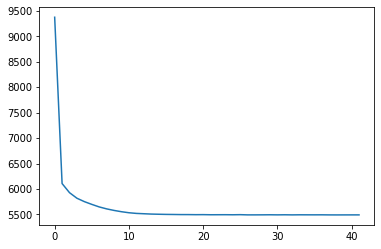

In [26]:
plt.plot(np.arange(len(obj_loss)), obj_loss)

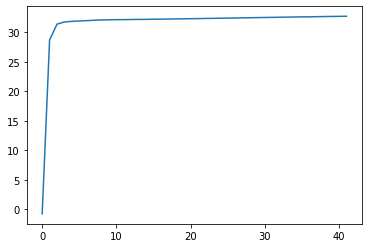

In [27]:
plt.plot(np.arange(len(recon_loss)), recon_loss)

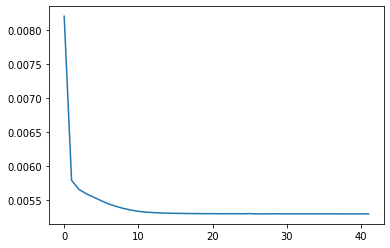

In [28]:
plt.plot(np.arange(len(overlap_loss)), overlap_loss)

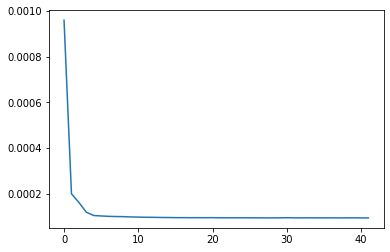

In [29]:
plt.plot(np.arange(len(sparsity_loss)), sparsity_loss)

In [31]:
trainer.trainset.shape

torch.Size([3993996, 41])

In [168]:
x = trainer.trainset[200].to(ssvae.device)
recon = ssvae.reconstruct(x)

In [169]:
qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

In [170]:
qz_x

Normal(loc: torch.Size([1, 16]), scale: torch.Size([1, 16]))

In [171]:
px_z

Laplace(loc: torch.Size([1, 41]), scale: torch.Size([1, 41]))

In [172]:
style_score

tensor([[ 0.0581, -0.0577,  0.0344,  0.0104,  0.0959,  0.0884,  0.0650,  0.0609,
          0.0040, -0.0761, -0.0290, -0.0698, -0.0234, -0.0751, -0.0453, -0.0072]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

In [173]:
ssvae.dec(style_score)

(tensor([[0.4116, 0.4058, 0.4056, 0.4195, 0.4376, 0.4561, 0.4588, 0.4959, 0.3310,
          0.3096, 0.2644, 0.2245, 0.2165, 0.2216, 0.2100, 0.2289, 0.8729, 0.8513,
          0.8341, 0.8275, 0.8182, 0.8076, 0.8147, 0.8088, 0.4488, 0.4556, 0.4583,
          0.4612, 0.4729, 0.4749, 0.4877, 0.4801, 0.0013, 0.0014, 0.0015, 0.0017,
          0.0018, 0.0019, 0.0021, 0.0022, 0.3331]], device='cuda:0',
        grad_fn=<AddmmBackward>), tensor(0.1000, device='cuda:0'))

In [190]:
traverse = np.arange(-3., 3.1, 0.1).astype(float)

In [193]:
index = np.random.choice(np.arange(len(trainer.trainset)), 500, replace=False)

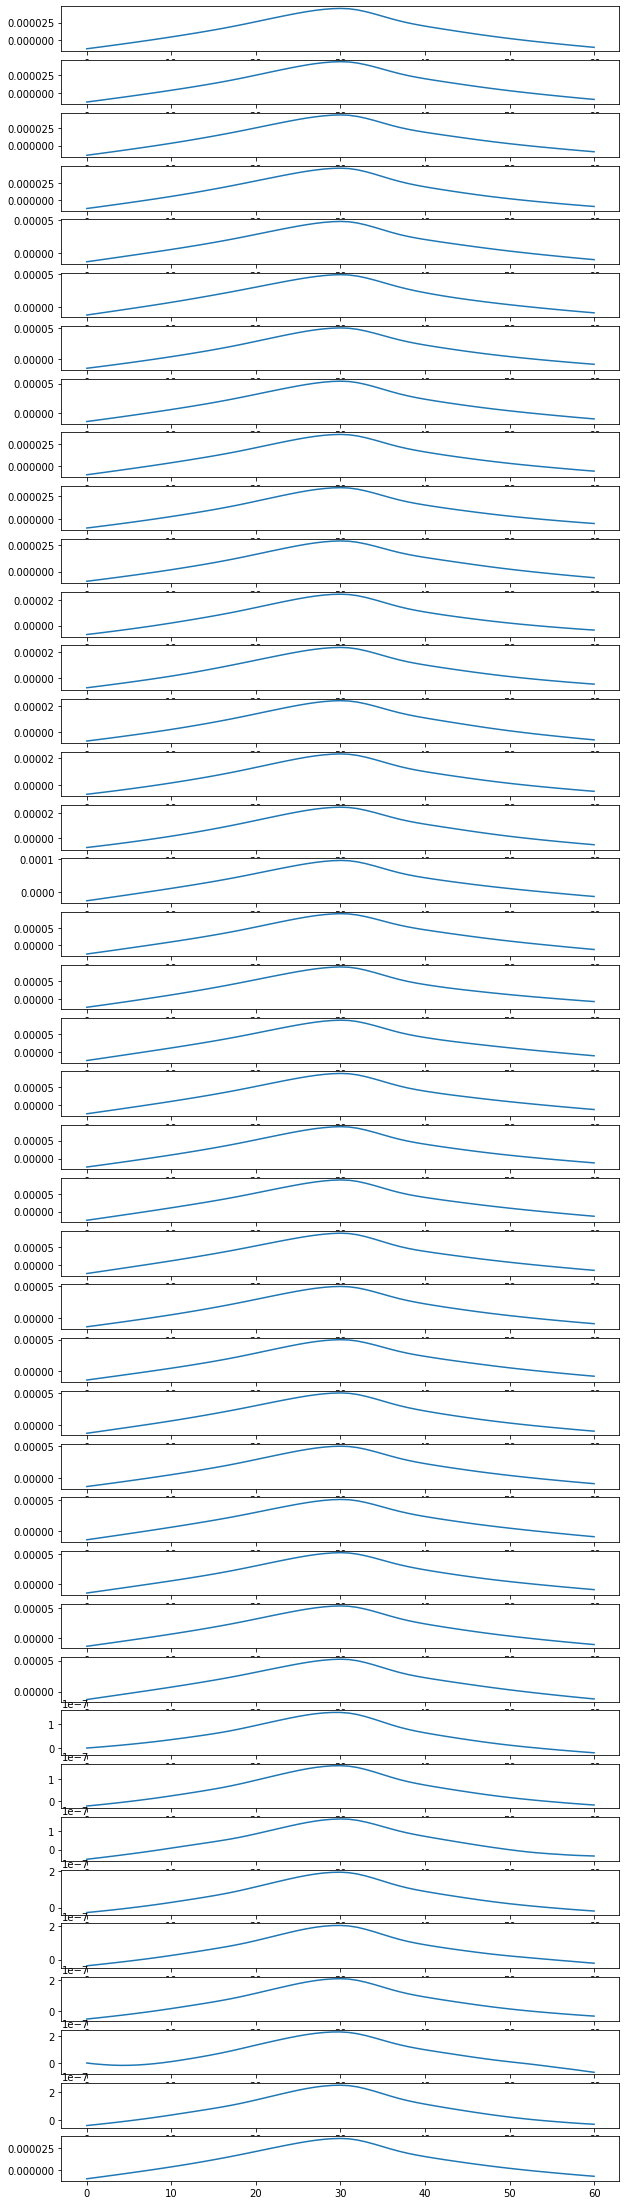

In [194]:
# Style 1
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, 0] = t
        t_style[0, 1:] = style_score[0, 1:]
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(trainer.trainset)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])

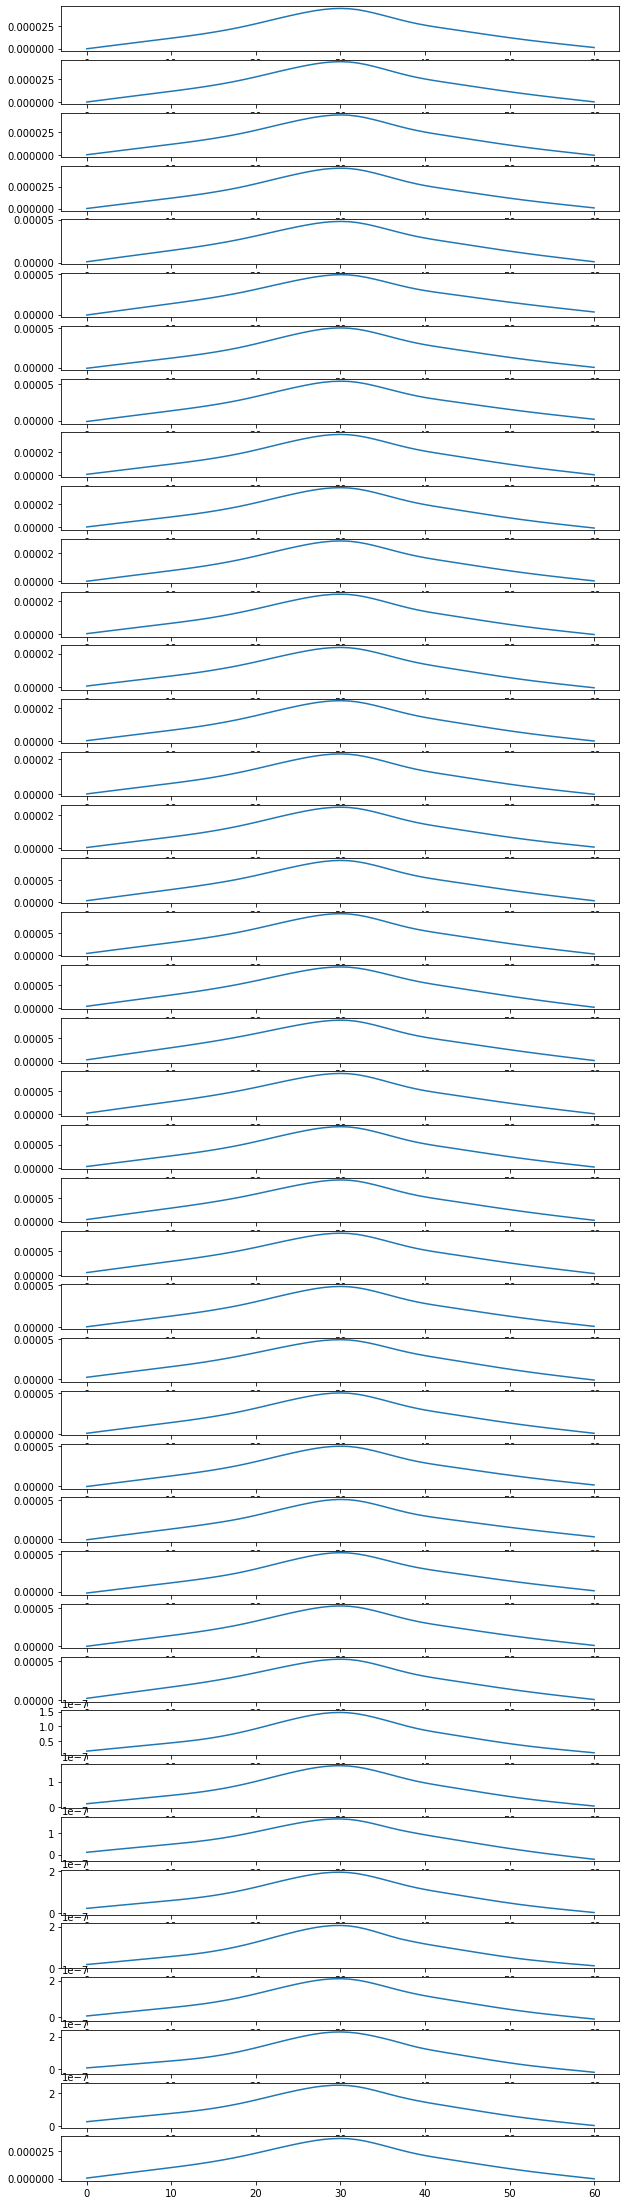

In [196]:
# Style 2
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 1] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(trainer.trainset)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])

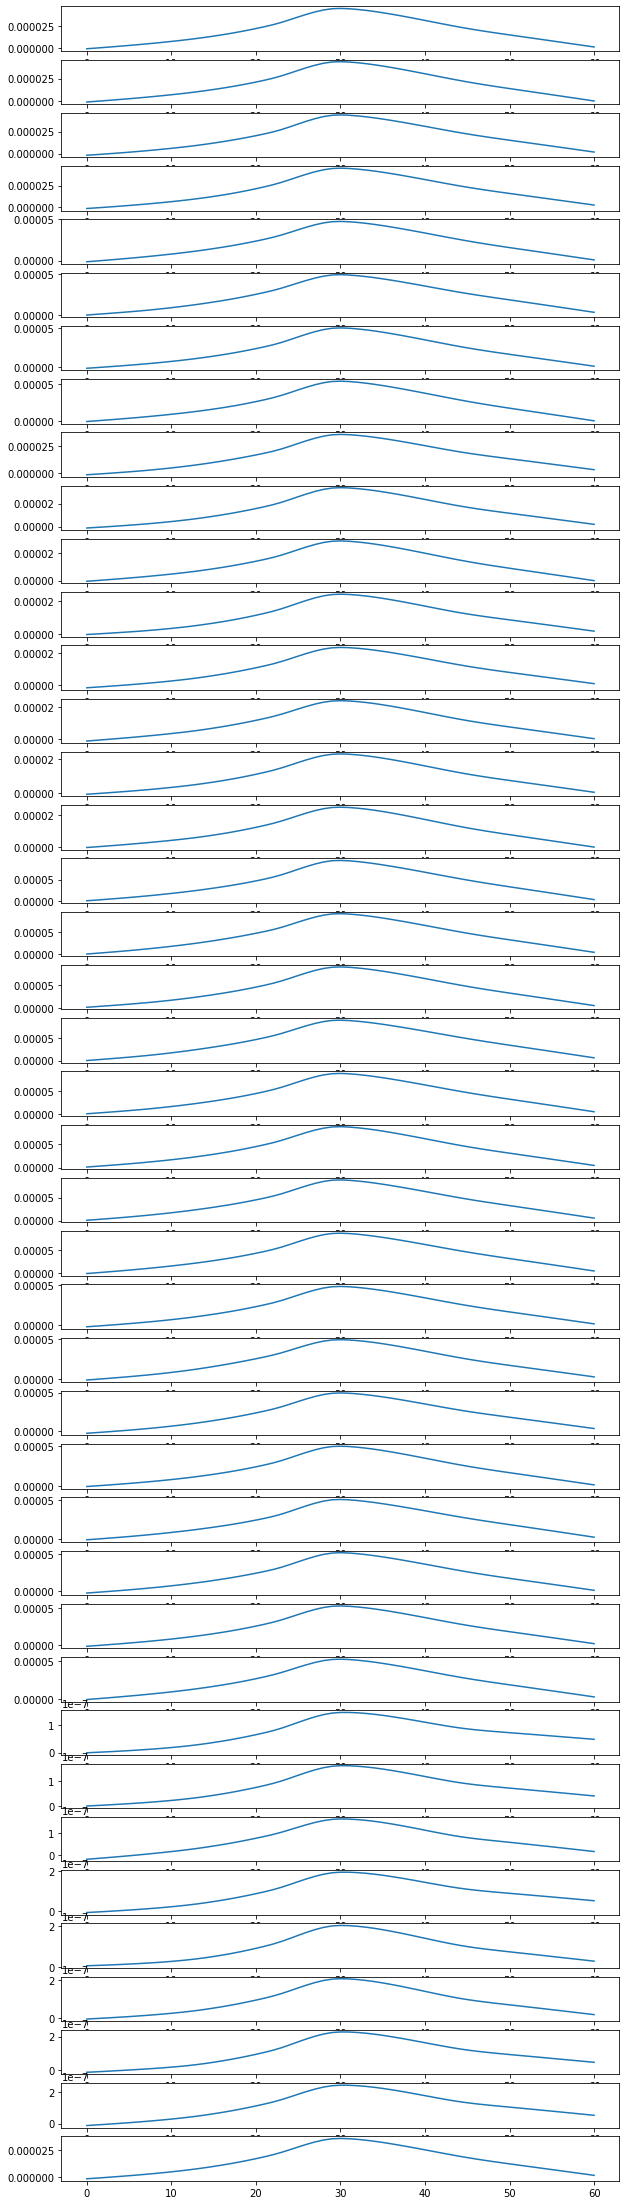

In [197]:
# Style 3
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 2] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(trainer.trainset)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])

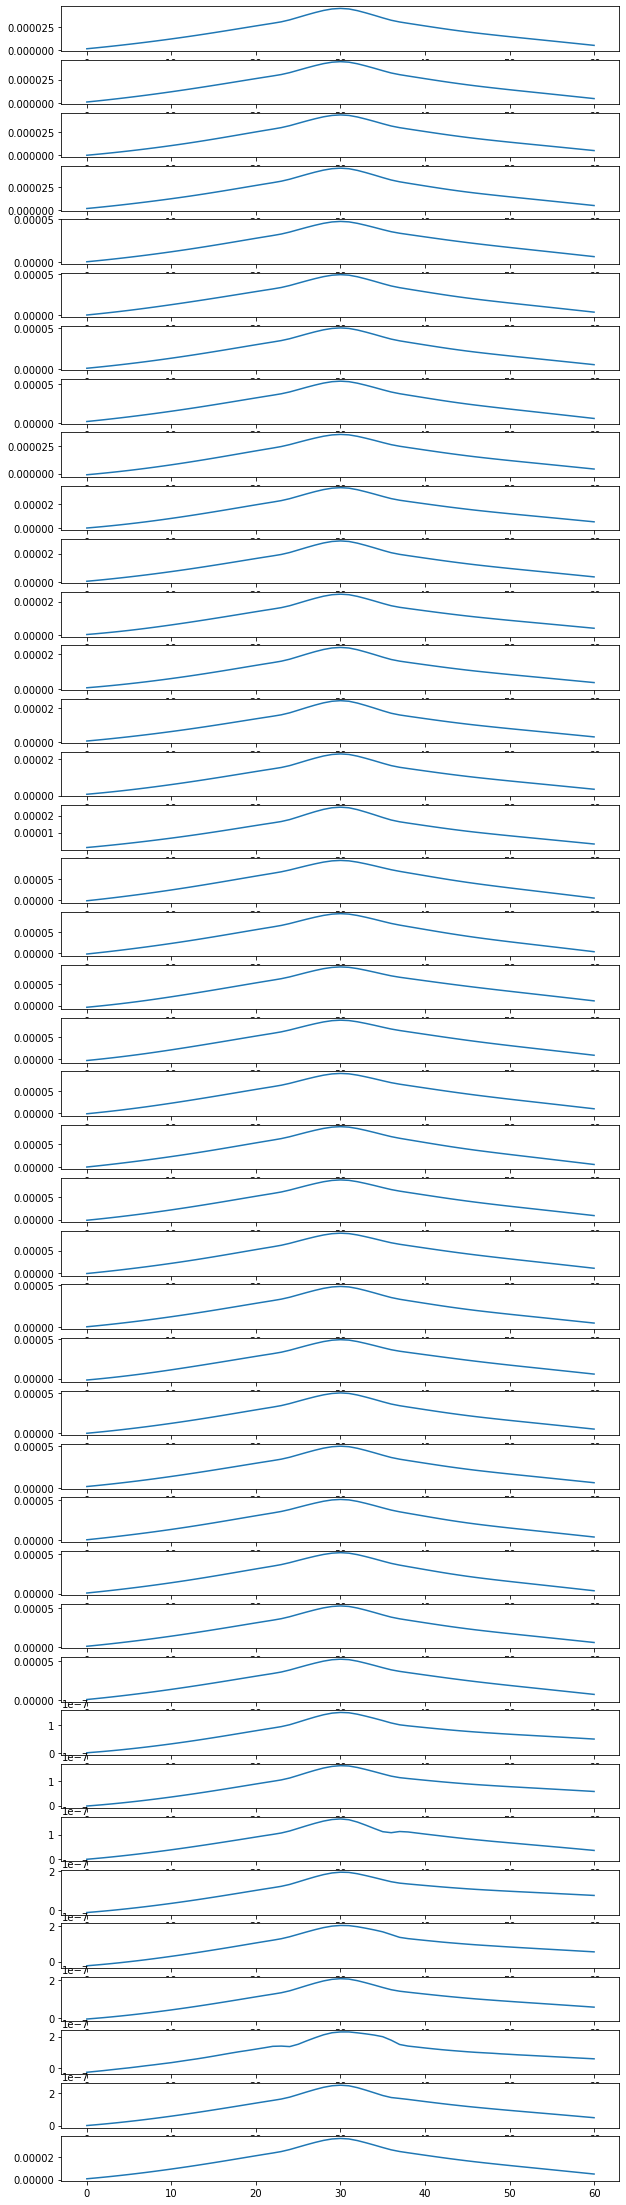

In [198]:
# Style 4
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 3] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(trainer.trainset)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])

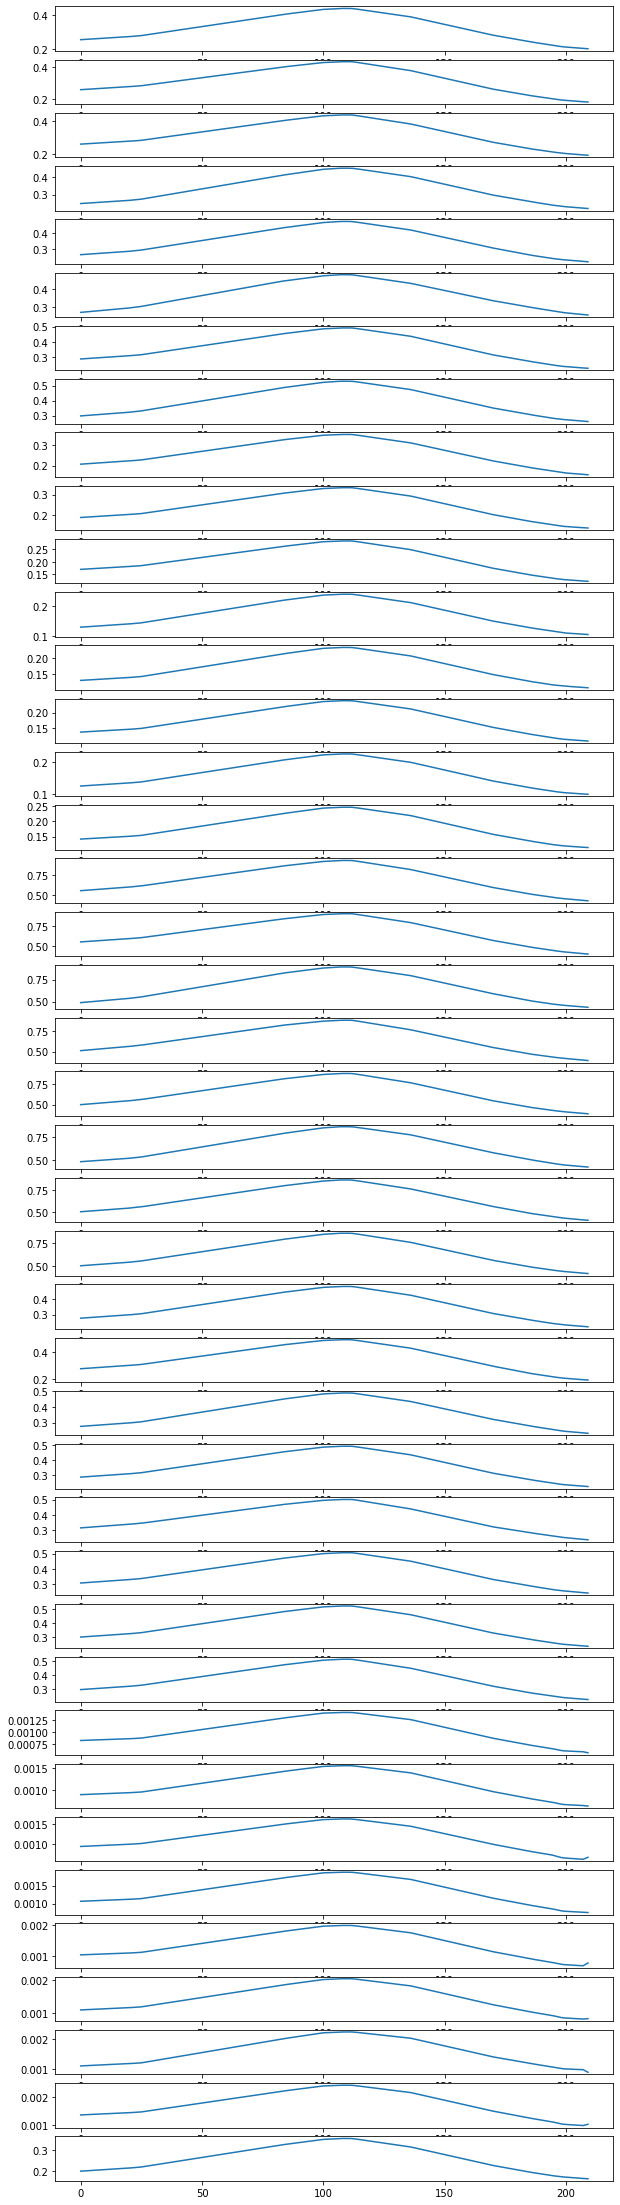

In [166]:
# Style 5
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 4] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(trainer.trainset)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])

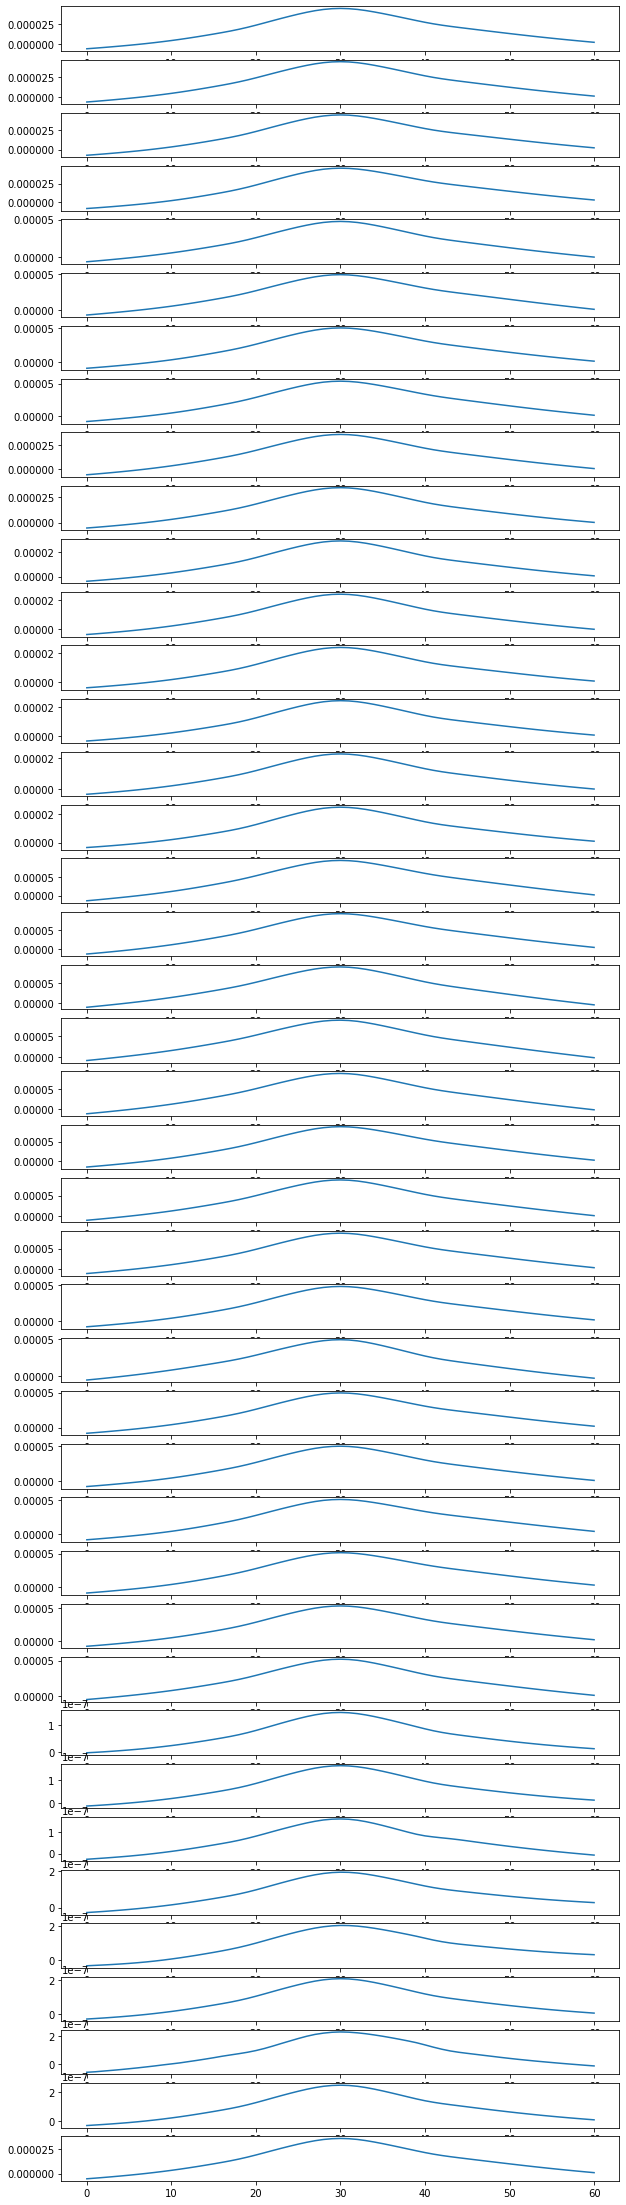

In [199]:
# Style 6
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 5] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(trainer.trainset)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])

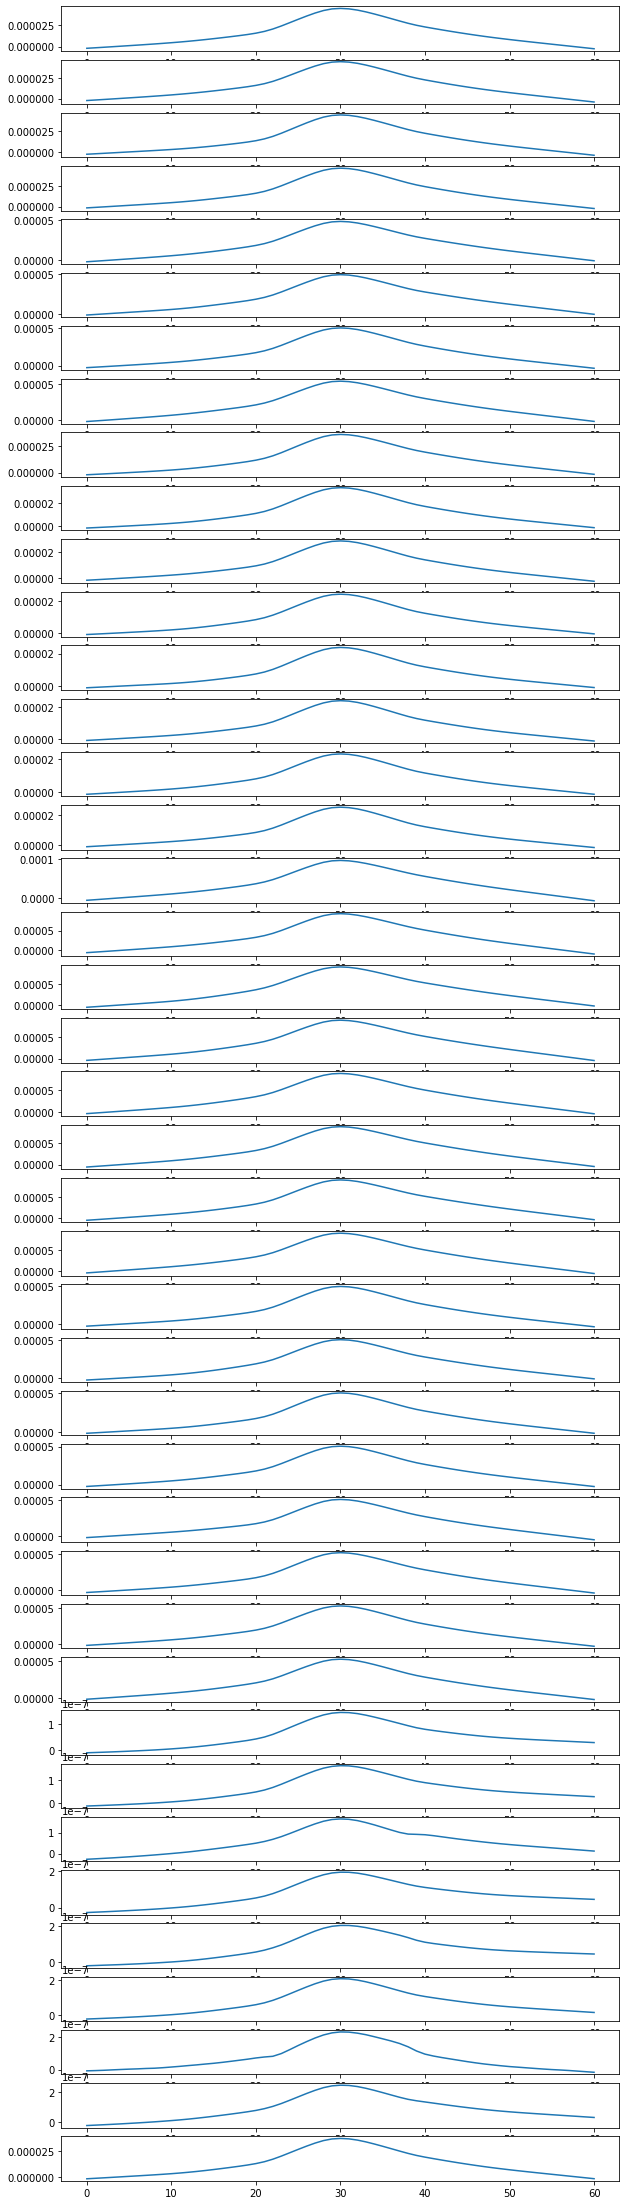

In [205]:
# Style 10
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 9] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(trainer.trainset)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])